<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JulioOsvaldoHernandezBucio/blob/main/Semana6_DataAnalysisWithPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Semana 6. Data Analysis with Python (IBM). Modulo 3. Julio Osvaldo Hernandez Bucio. A01794366. Dra. María de la Paz Rico Fernández. 21/10/22.**

# **Exploratory Data Analysis**

Exploratory Data Analysis, or in short “EDA”, is an approach to analyze data in order to:
- summarize main characteristics of the data - gain better understanding of the dataset,
- uncover relationships between different variables, and
- extract important variables for the problem we are trying to solve.

# **Descriptive Statistics**

Descriptive statistical analysis helps to describe basic features of a dataset and obtains a short summary about the sample and measures of the data.

One way in which we can do this is by using the describe() function in pandas. Using the describe function and applying it on your dataframe, the "describe" function automatically computes basic statistics for all numerical variables. It shows the mean, the total number of data points, the standard deviation, the quartiles and the extreme values. Any NaN values are automatically skipped in these statistics.

In [ ]:
df.describe()

You could have also categorical variables in your dataset. These are variables that can be divided up into different categories, or groups and have discrete values. 

One way you can summarize the categorical data is by using the function value_counts(). We can change the name of the column to make it easier to read.

In [ ]:
drive_wheels_counts=df[]

Boxplots are a great way to visualize numeric data, since you can visualize the various distributions of the data.
The main features that the boxplot shows are the median of the data, which represents where the middle datapoint is. The Upper Quartile shows where the 75th percentile
is, the Lower Quartile shows where the 25th percentile is. The data between the Upper and Lower Quartile represents the Interquartile Range.
Next, you have the Lower and Upper Extremes. These are calculated as 1.5 times the interquartile range above the 75th percentile, and as 1.5 times the IQR below the 25th percentile.

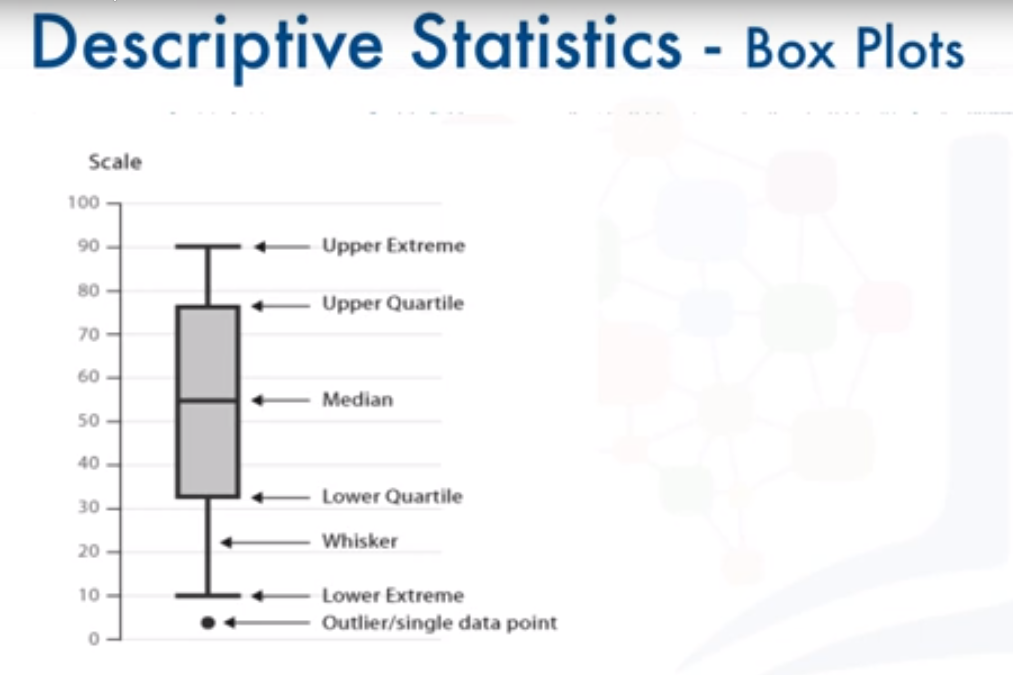

Boxplots make it easy to compare between groups. In this example, using Boxplot we can see the distribution of different categories of the “drive-wheels” feature over price feature.

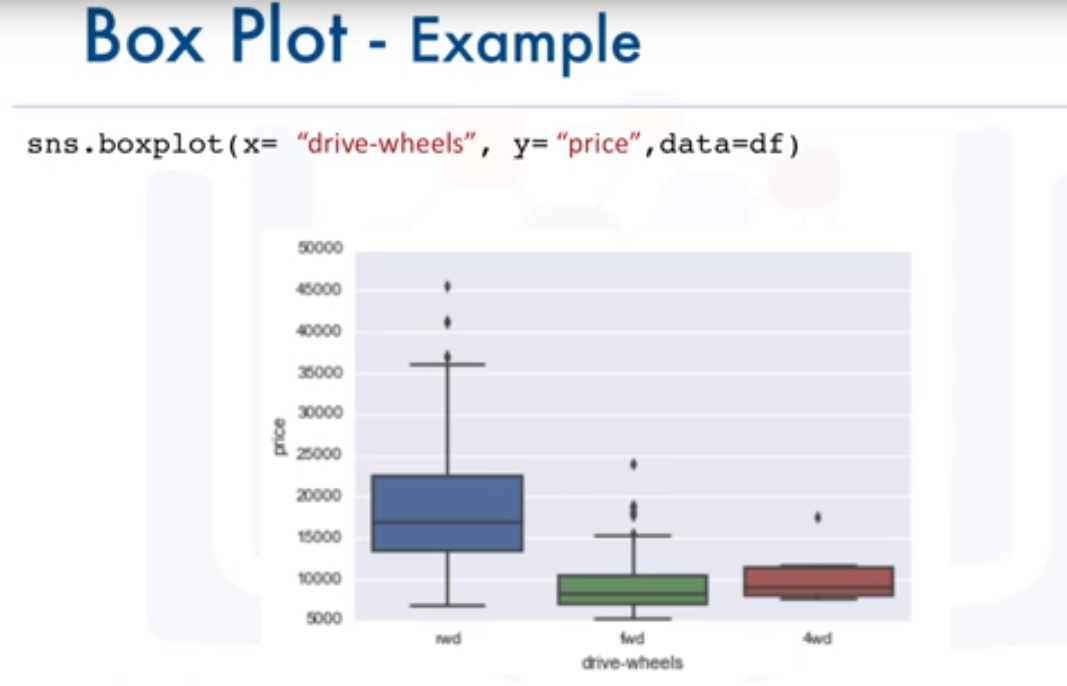

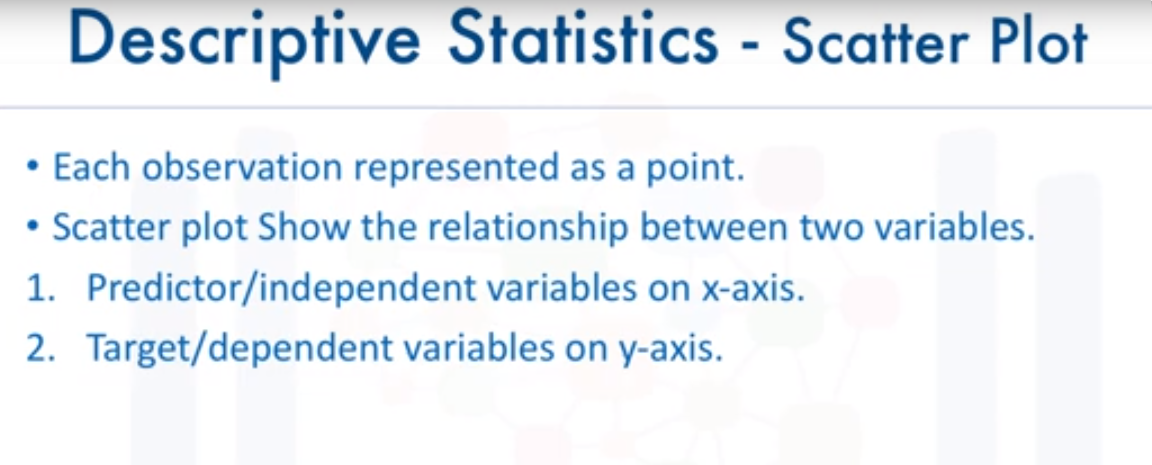

# **GroupBy**

The group by method is used on categorical variables, groups the data into subsets according to the different categories of that variable.

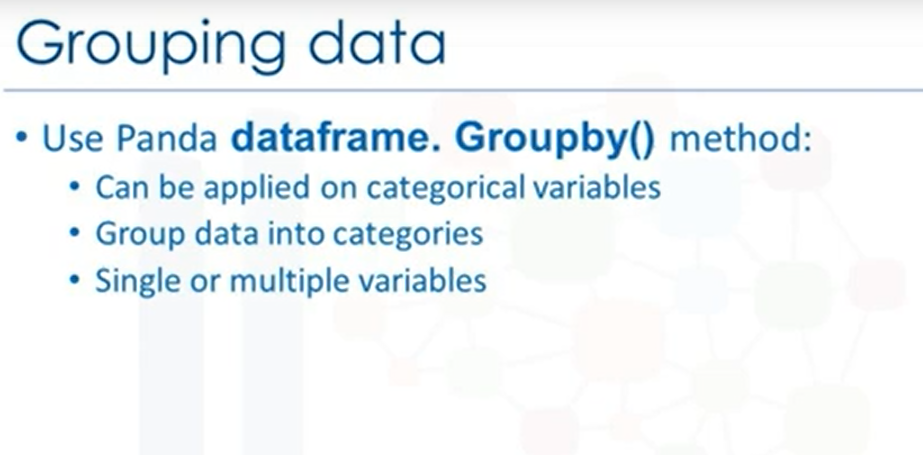

Let’s say we are interested in finding the average price of vehicles and
observe how they differ between different types of “body-style” and “drive-wheels” variables.

To do this, we first pick out the three data columns we are interested in, which is done in the first line of code.

In [ ]:
df_test = df[['drive-wheels', 'body-style', 'price']]

We then group the reduced data according to ‘drive-wheels’ and ‘body-style’. Since we are interested in knowing how the average price differs across the board, we can take the mean of each group and append this bit at the very end of line 2.

In [ ]:
df_grp = df_test.groupby(['drive-wheels', 'body-style'], as_index=False).mean()

A pivot table has one variable displayed along the columns and the other variable displayed along the rows.

In [ ]:
df_pivot = df_grp.pivot(index= 'drive-wheels', columns = 'body-style')

The price data now becomes a rectangular grid, which is easier to visualize.

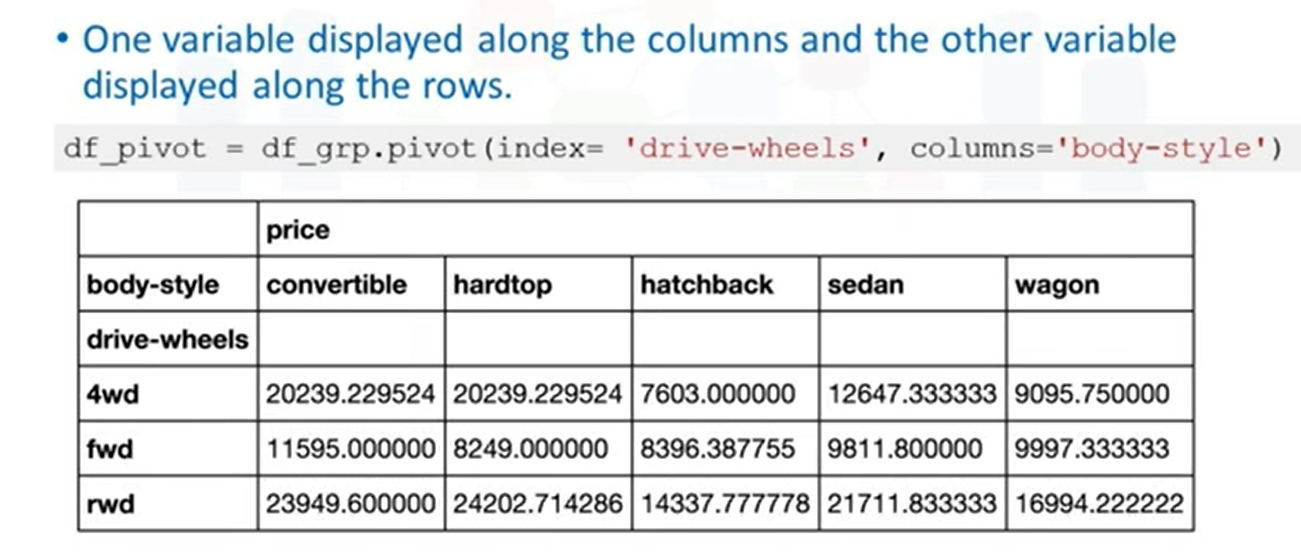

Another way to represent the pivot table is using a heatmap plot.

Heatmap takes a rectangular grid of data and assigns a color intensity based on the data value at the grid points.

In this example, we use pyplot’s pcolor method to plot a heatmap and convert the
previous pivot table into a graphical form.
We specified the Red-blue color scheme.
In the output plot, each type of “body-style” is numbered along the x-axis, and each type of “drive wheels” is numbered along the y-axis.

In [ ]:
plt.pcolor(df_pivot, cmap ='RdBu')
plt.colorbar()
plt.show()

In the output plot, each type of “body-style” is numbered along the x-axis, and each type of “drive wheels” is numbered along the y-axis.

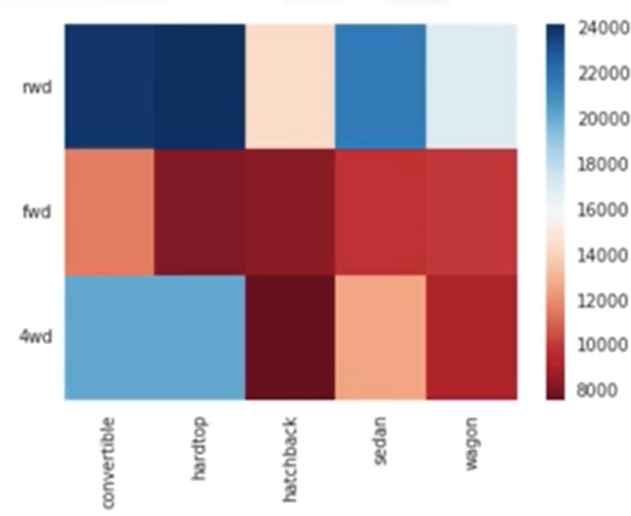

# **Analysis of Variance ANOVA**

Assume that we want to analyze a categorical variable and see the correlation among different categories.

The diagram shows the average price of different vehicle makes.

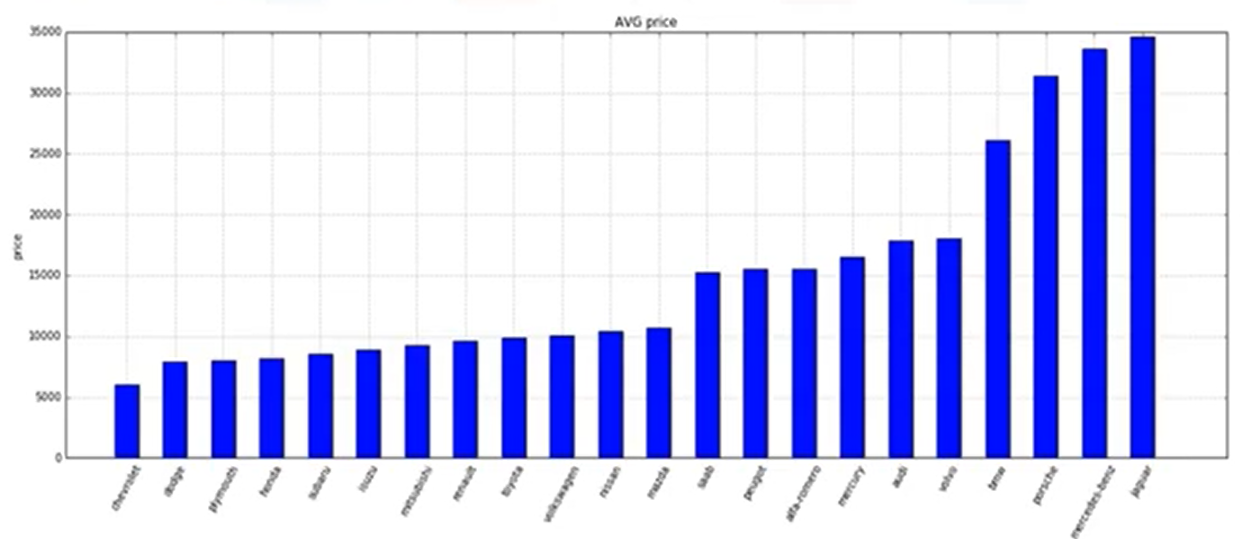

To analyze categorical variables such as the "make" variable, we can use a method such as the ANOVA method.

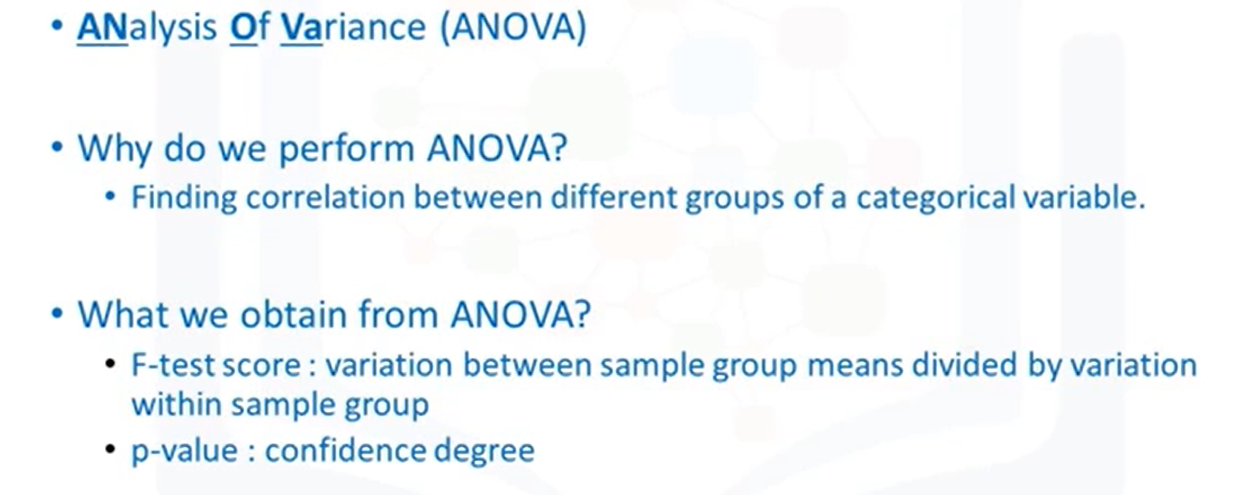

This diagram illustrates a case where the F-test score would be small. Because, as we can see the variation of the prices in each group of data is way larger
than the differences between the average values of each group.

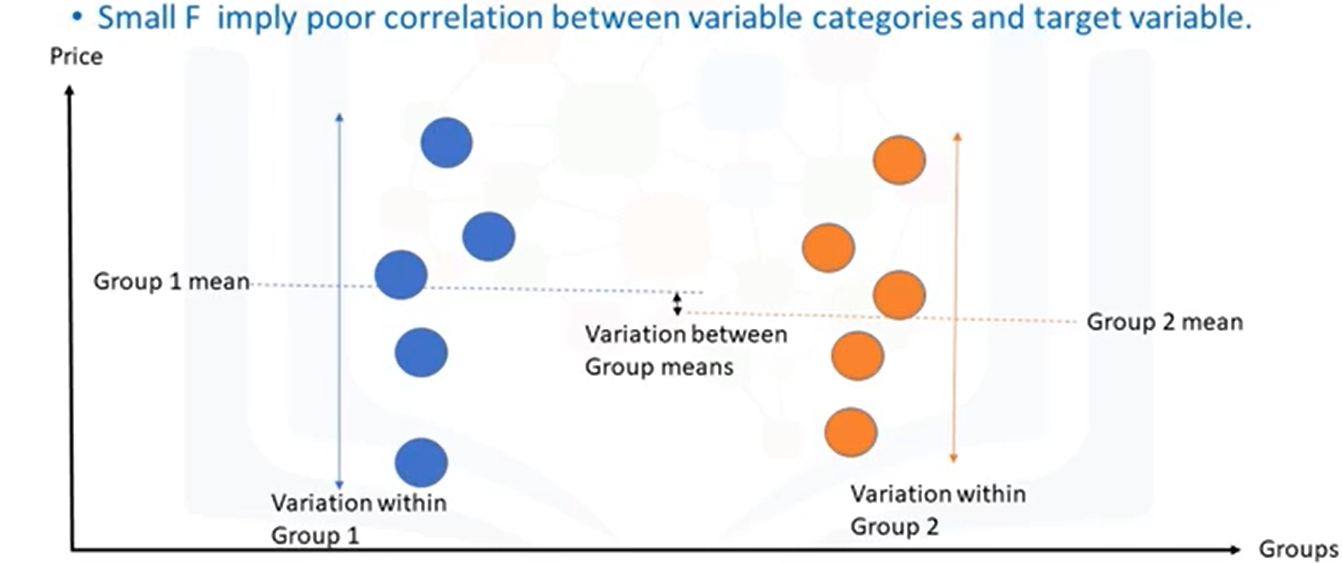

Since the F-score is small, the correlation between price as the target variable and the groupings is weak.

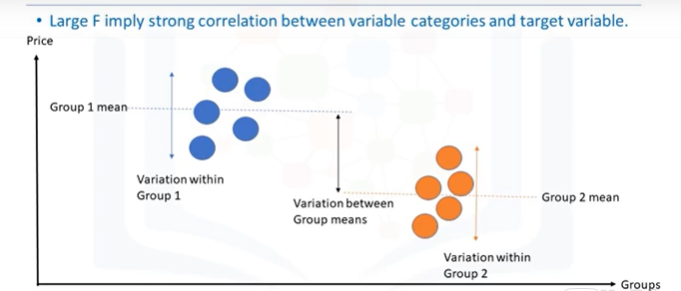


Since the F-score is large, thus the correlation is strong in this case.

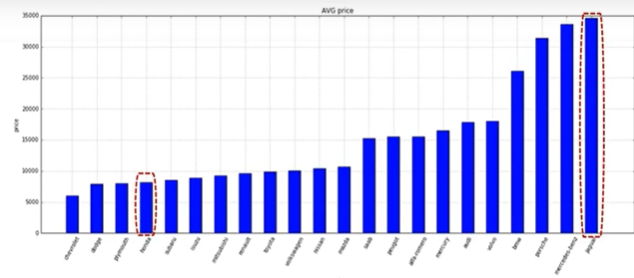

On the other hand, we can expect a large F-value between Hondas and Jaguars because the differences between the prices is very significant.
However, from this chart we do not know the exact variances, so let's perform an ANOVA

In the first line we extract the make and price data.

In [ ]:
df_anova = df[["make", "price"]]

Then, we'll group the data by different makes.

In [ ]:
grouped_anova = df_anova.groupb([["make"])

The ANOVA test can be performed in Python using the f_oneway method as the built-in function of the Scipy package.

We pass in the price data of the two car make groups that we want to compare and it calculates the ANOVA results.

In [ ]:
anova_results_l=stats.f_oneway(grouped_anova.get_group("honda"))

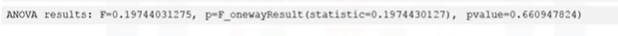

The results confirm what we guessed at first.

We can do the same for Honda and Jaguar.

In [ ]:
anova_results_l=stats.f_oneway(grouped_anova.get_group("honda")["price"], grouped_anova.get_group("jaguar")["price"])

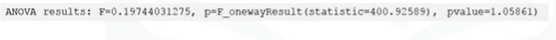

The prices between Hondas and Jaguars are significantly different, since the F-score is very large (F = 401) and the p-value is larger than 0.05.

We can say that there is a strong correlation between a categorical variable
and other variables, if the ANOVA test gives us a large F-test value and a small p-value.

# **Correlation**

Correlation is a statistical metric for measuring to what extent different variables are interdependent.

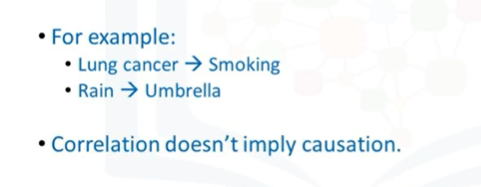

Let’s look at the correlation between engine size and price.

In [ ]:
sns.regplot(x="engine-size", y="prices", data=df)
plt.ylim(0,)

We’ll visualize these two variables using a scatterplot and an added linear line
called a “regression line”, which indicates the relationship between the two.

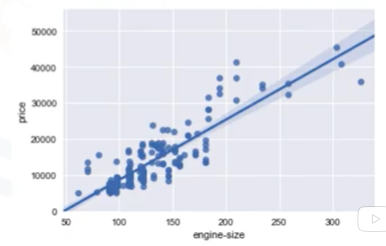

The main goal of this plot is to see whether the “engine-size” has any impact on the price.

In this example, you can see that the straight line through the data points is very steep, which shows that there is a positive linear relationship between the two variables.

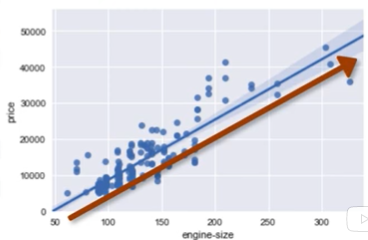

With increase in values of engine size, values of price go up as well and the slope of the line is positive, so there is a positive correlation between “engine-size” and “price”.

We can use seaborn regplot() to create the scatter plot.

As another example, now let’s look at the relationship between highway-miles per gallon to see its impact on the car "price"

In [ ]:
sns.regplot(x="highway-mpg", y="prices", data=df)
plt.ylim(0,)

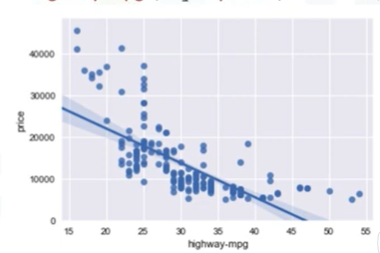

As we can see in this plot, when highway-mpg value goes up, the value of price goes down, therefore there is a negative linear relationship between highway-mpg and price.

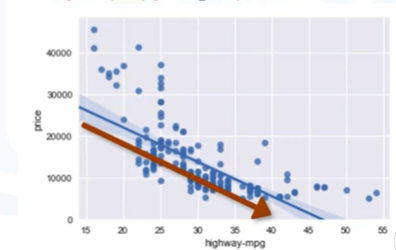

Although this relationship is negative, the slope of the line is steep which means that the highway miles per gallon is still a good predictor of price.

Finally, we have an example of a weak correlation

In [ ]:
sns.regplot(x="peak-rpm", y="prices", data=df)
plt.ylim(0,)

For expample, both low peak rpm and high values of peak rpm have low and high prices, therefore, we cannot use RPM to predict the values.

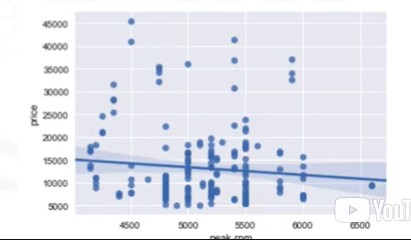

# **Correlation statistics**

One way to measure the strength of the correlation between continuous numerical variables is by using a method called Pearson Correlation.

The Pearson correlation method, will give you two values, the Correlation coefficient and the p-value.

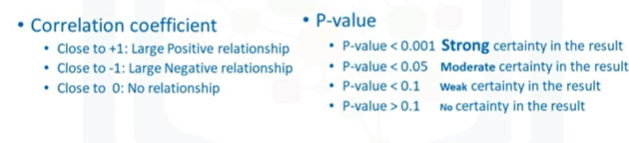

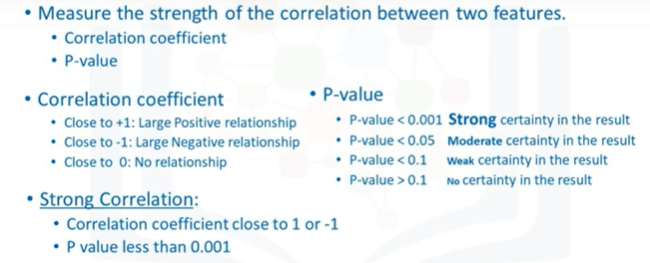

The following plot shows data with different correlation values.

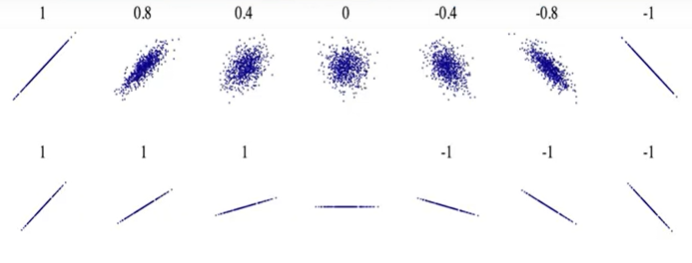

In [ ]:
person_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])

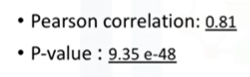

We can see that the correlation coefficient is approximately 0.8, and this is close to 1 so there is a strong positive correlation.

We can also see that the p-value is very small, much smaller than 0.001 and so we can conclude that we are certain about this strong positive correlation.

Taking all variables into account, we can now create a heatmap that indicates the correlation between each of the variables with one another.

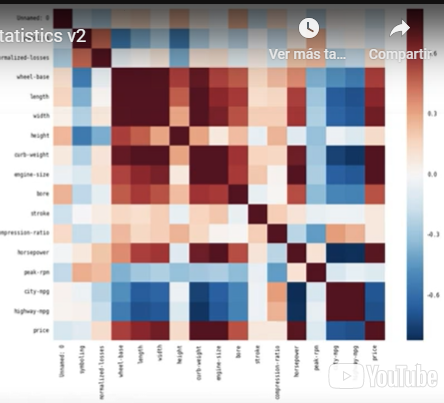

The color scheme indicates the Pearson correlation coefficient, indicating the strength of the correlation between two variables.

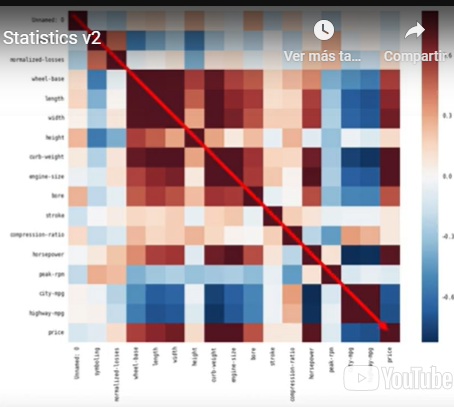

We can see a diagonal line with a dark red color, indicating that all the values on this diagonal are highly correlated.

# **Skills Network Labs**

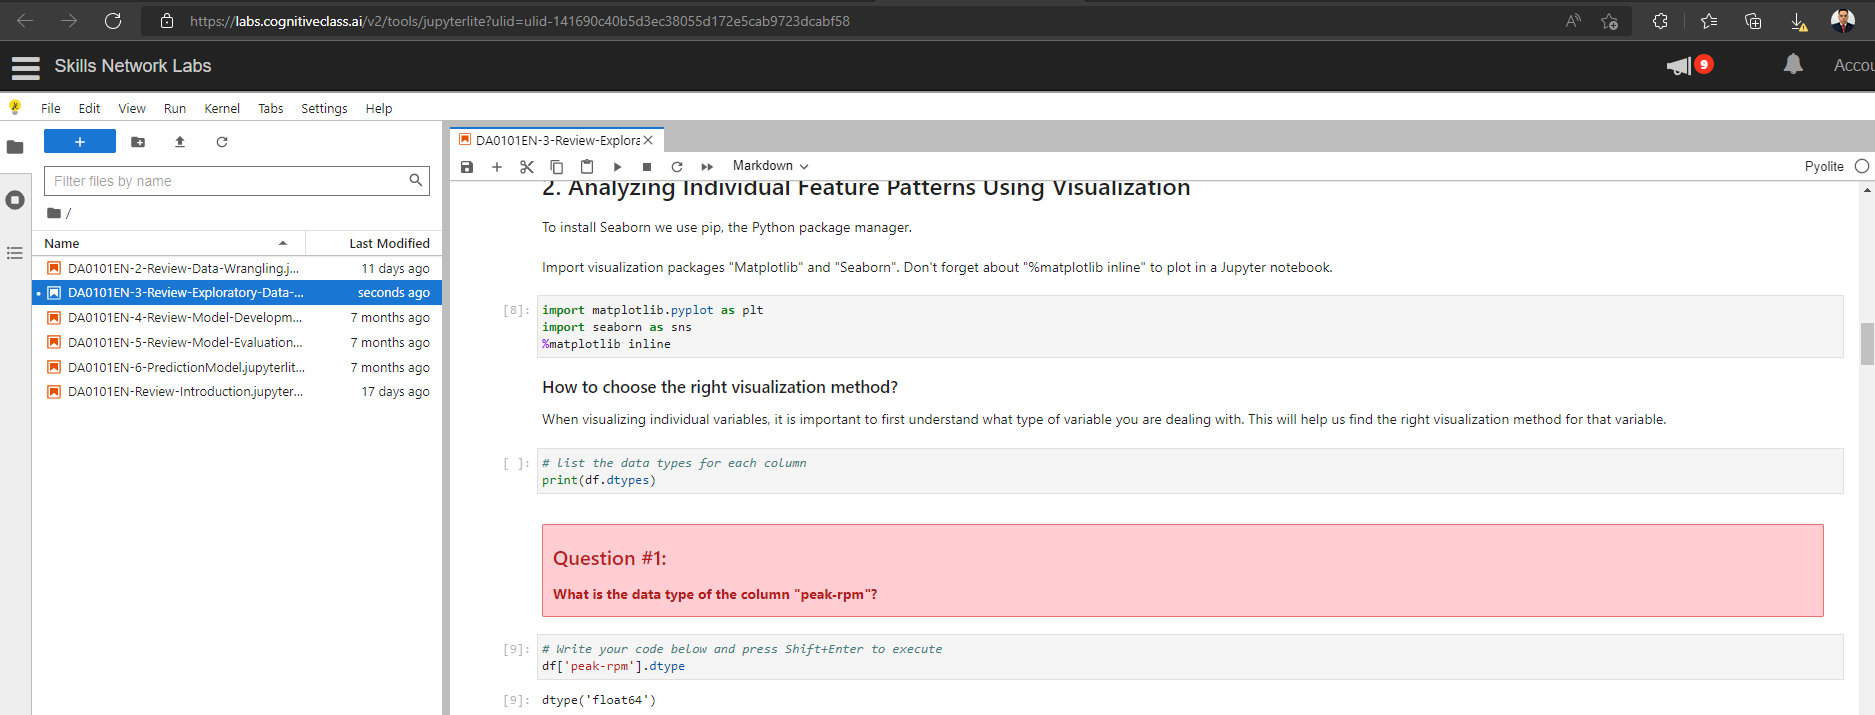

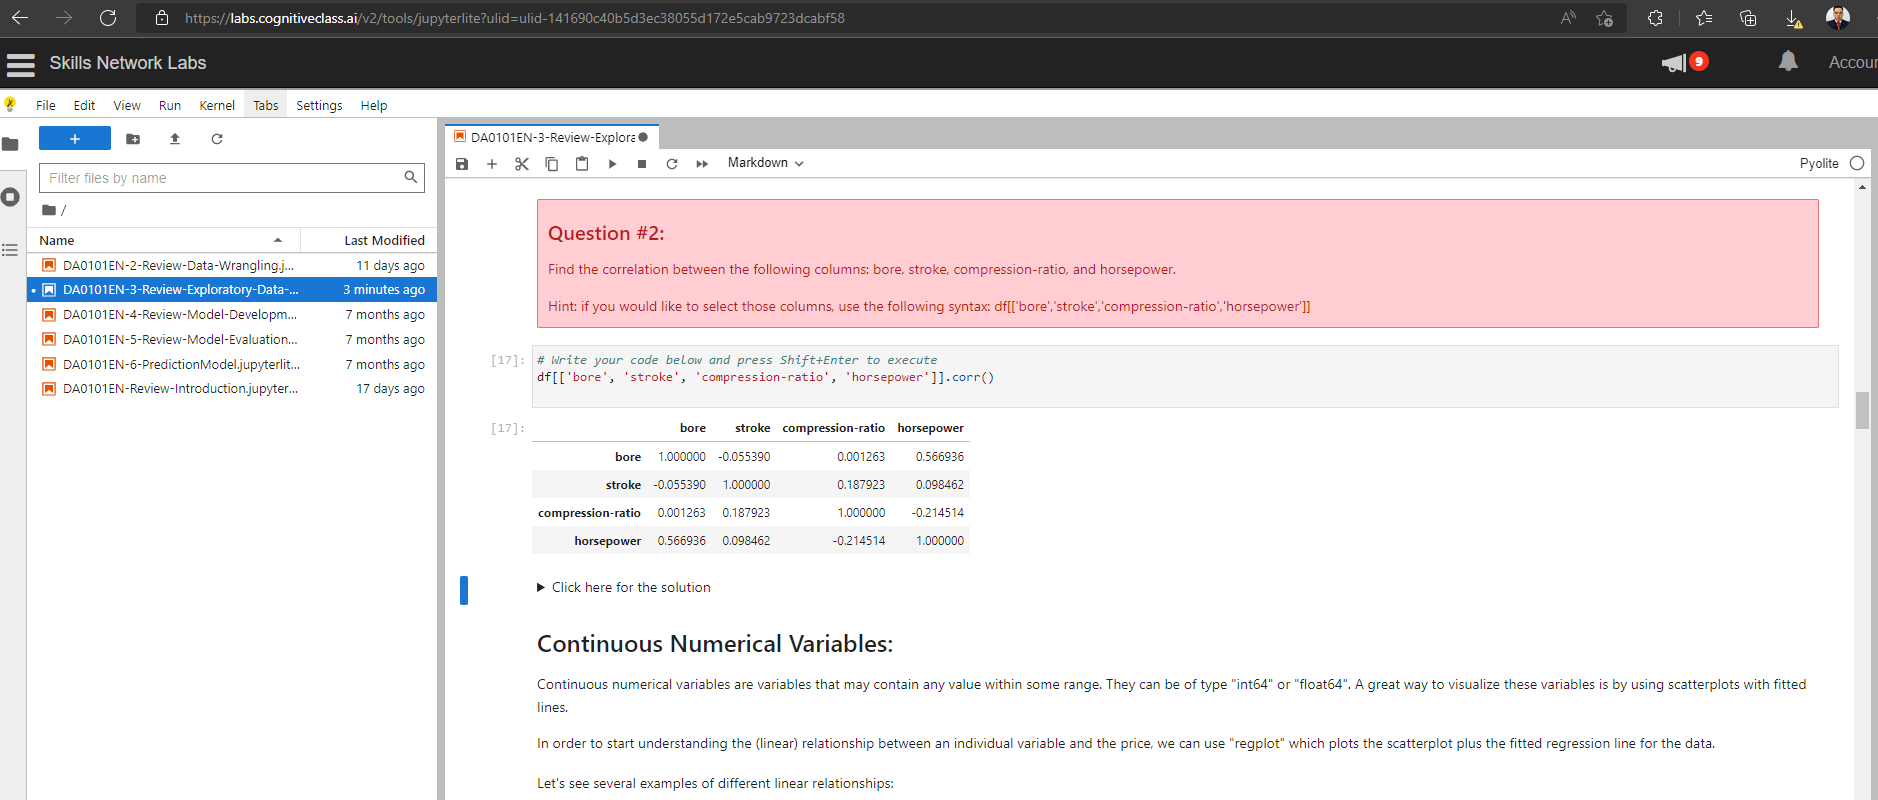

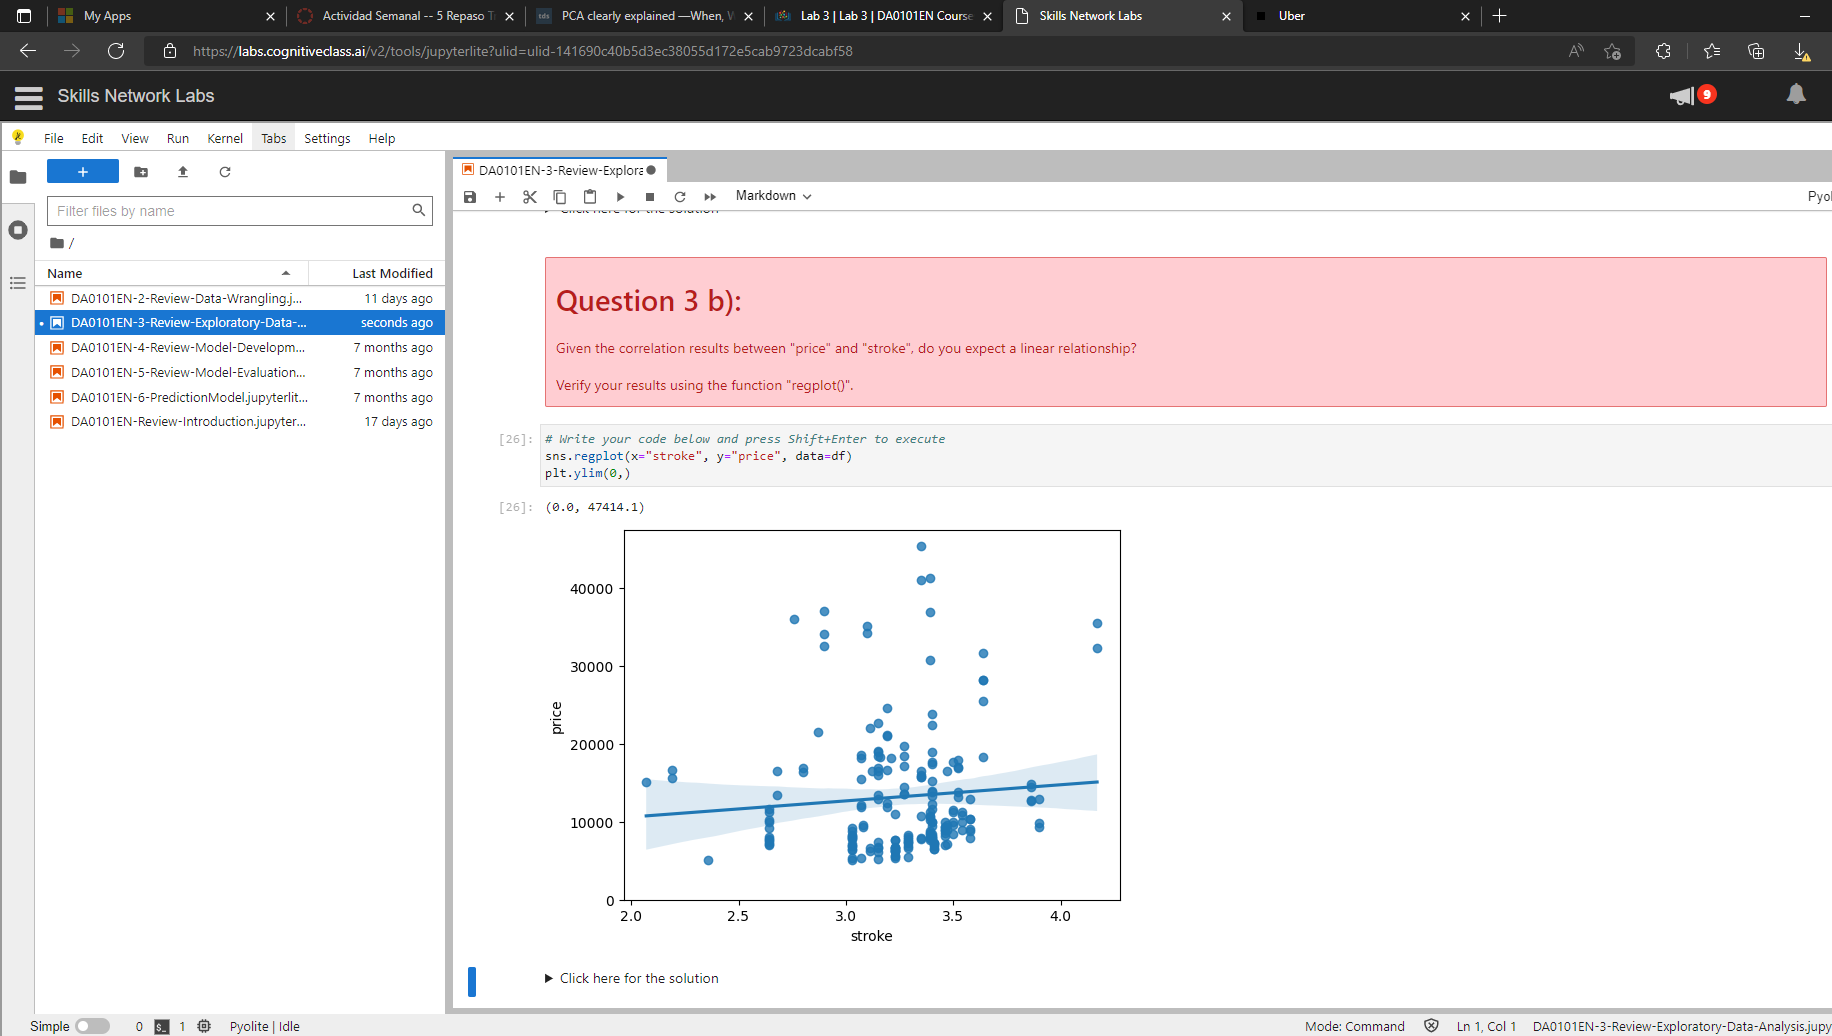

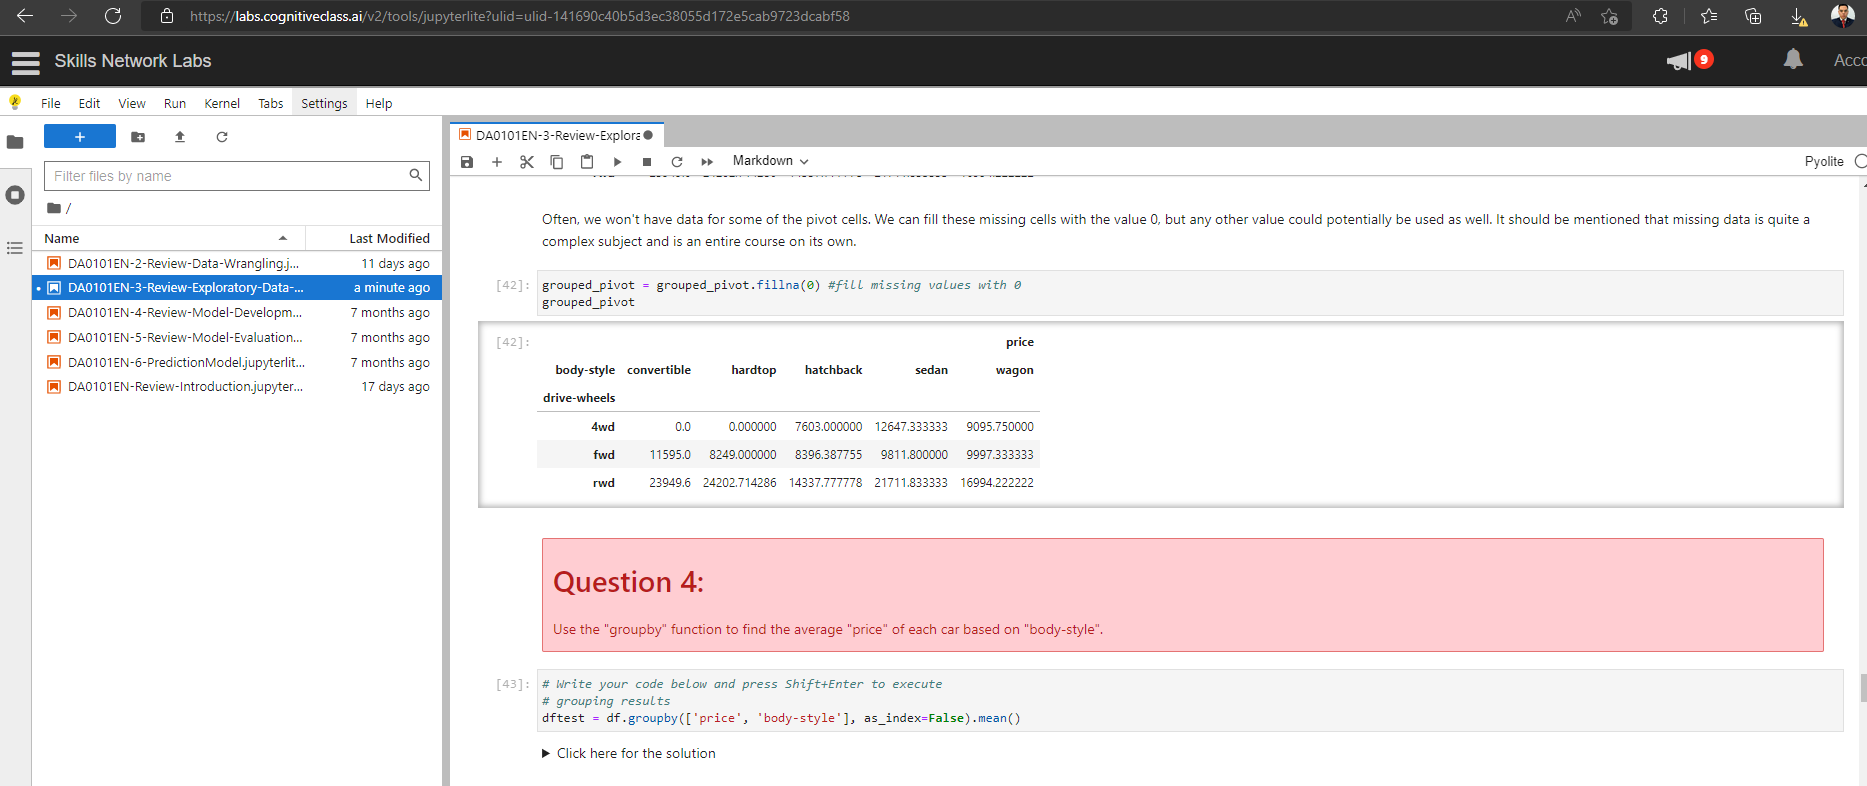

# **Graded Review Questions**

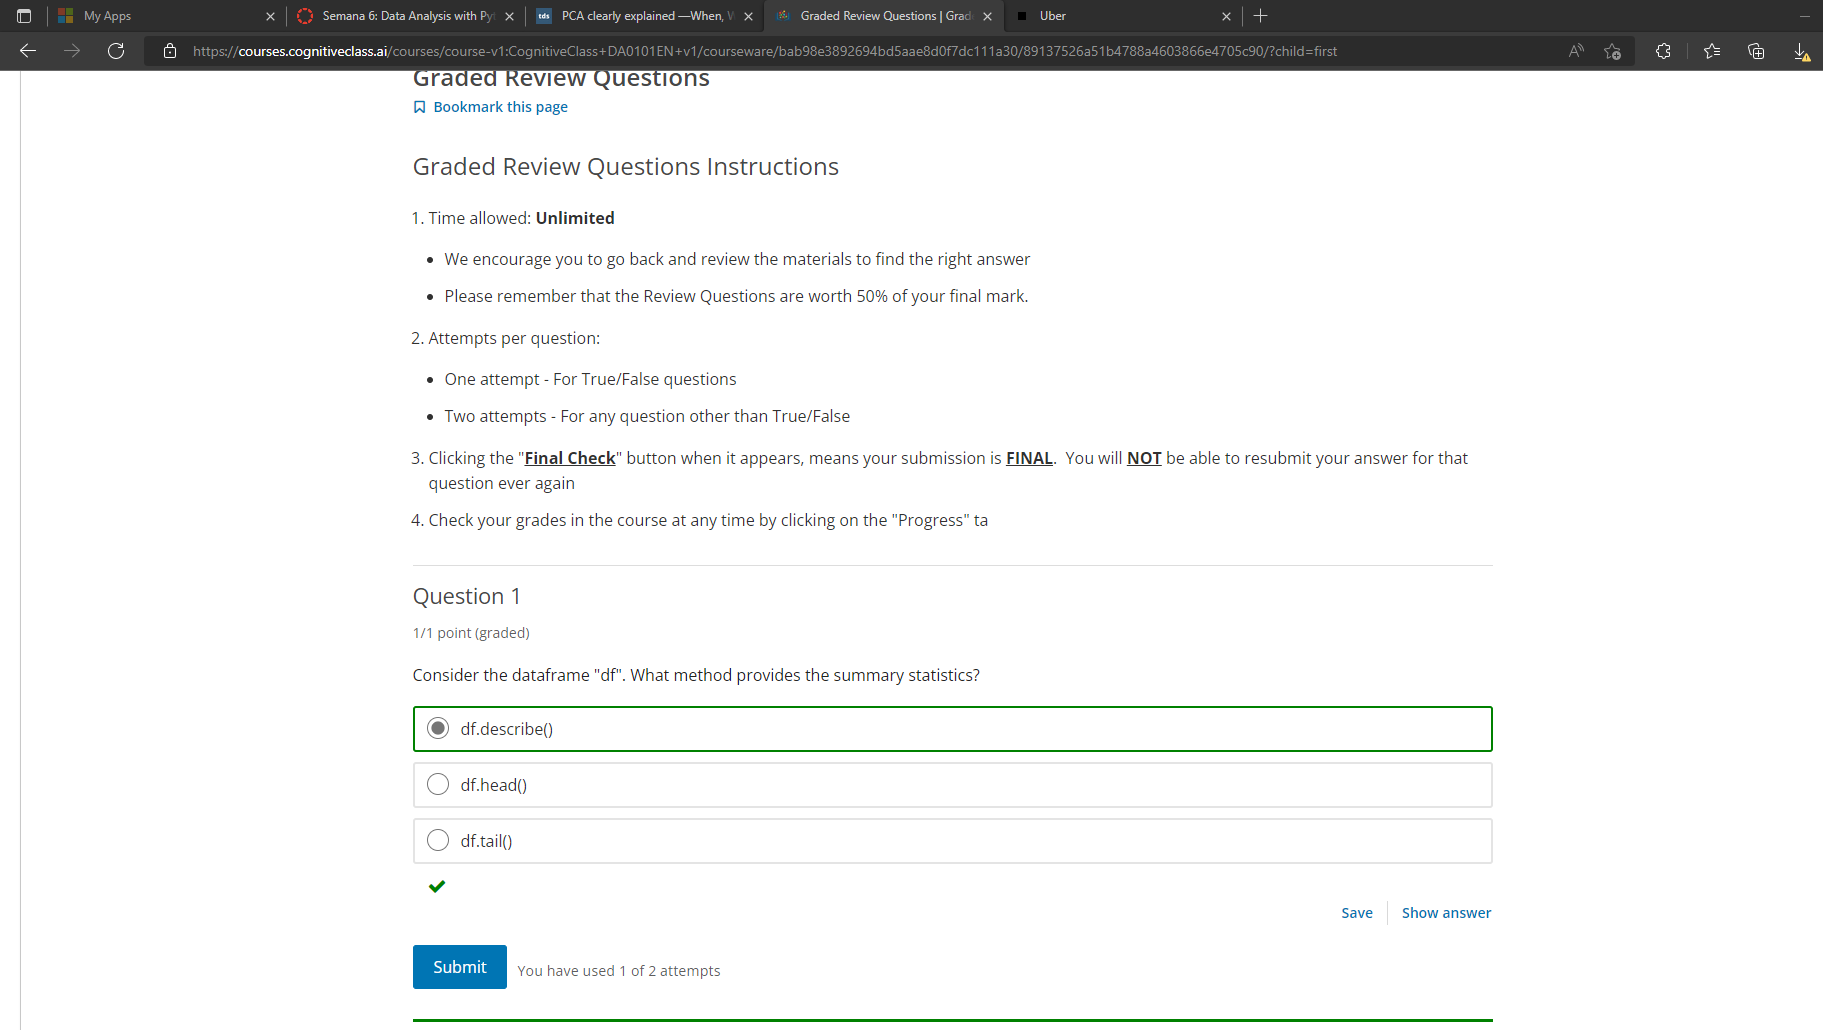

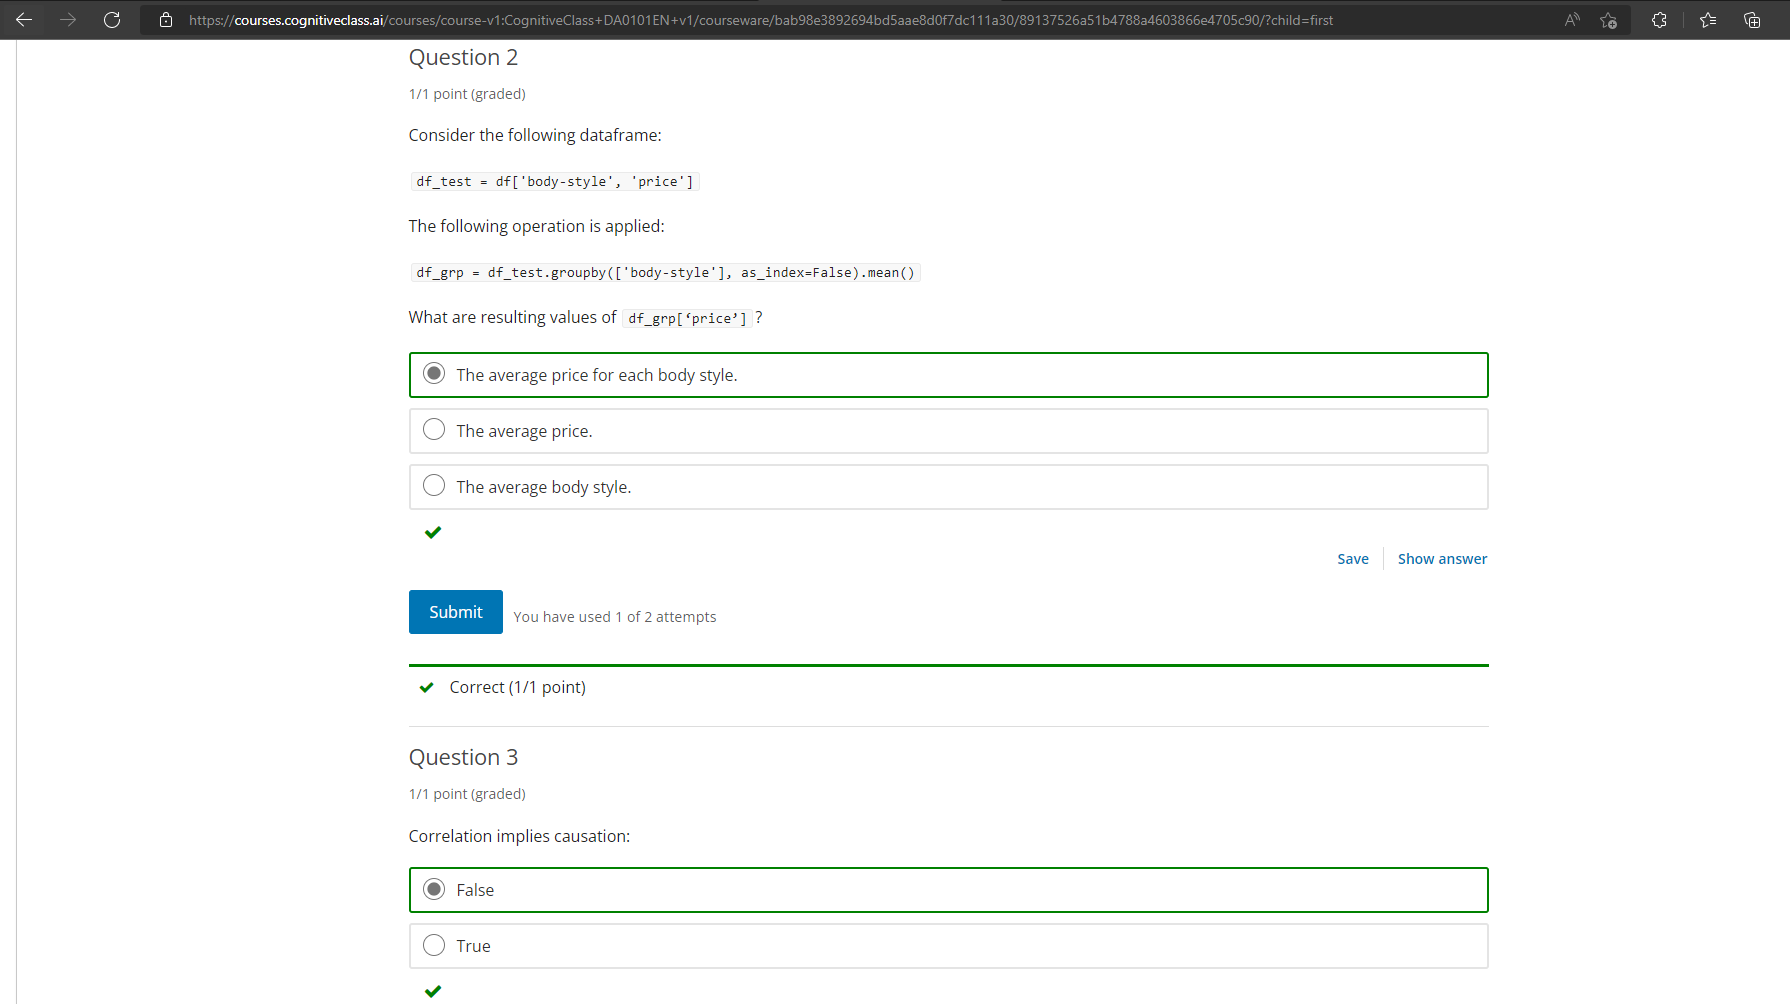

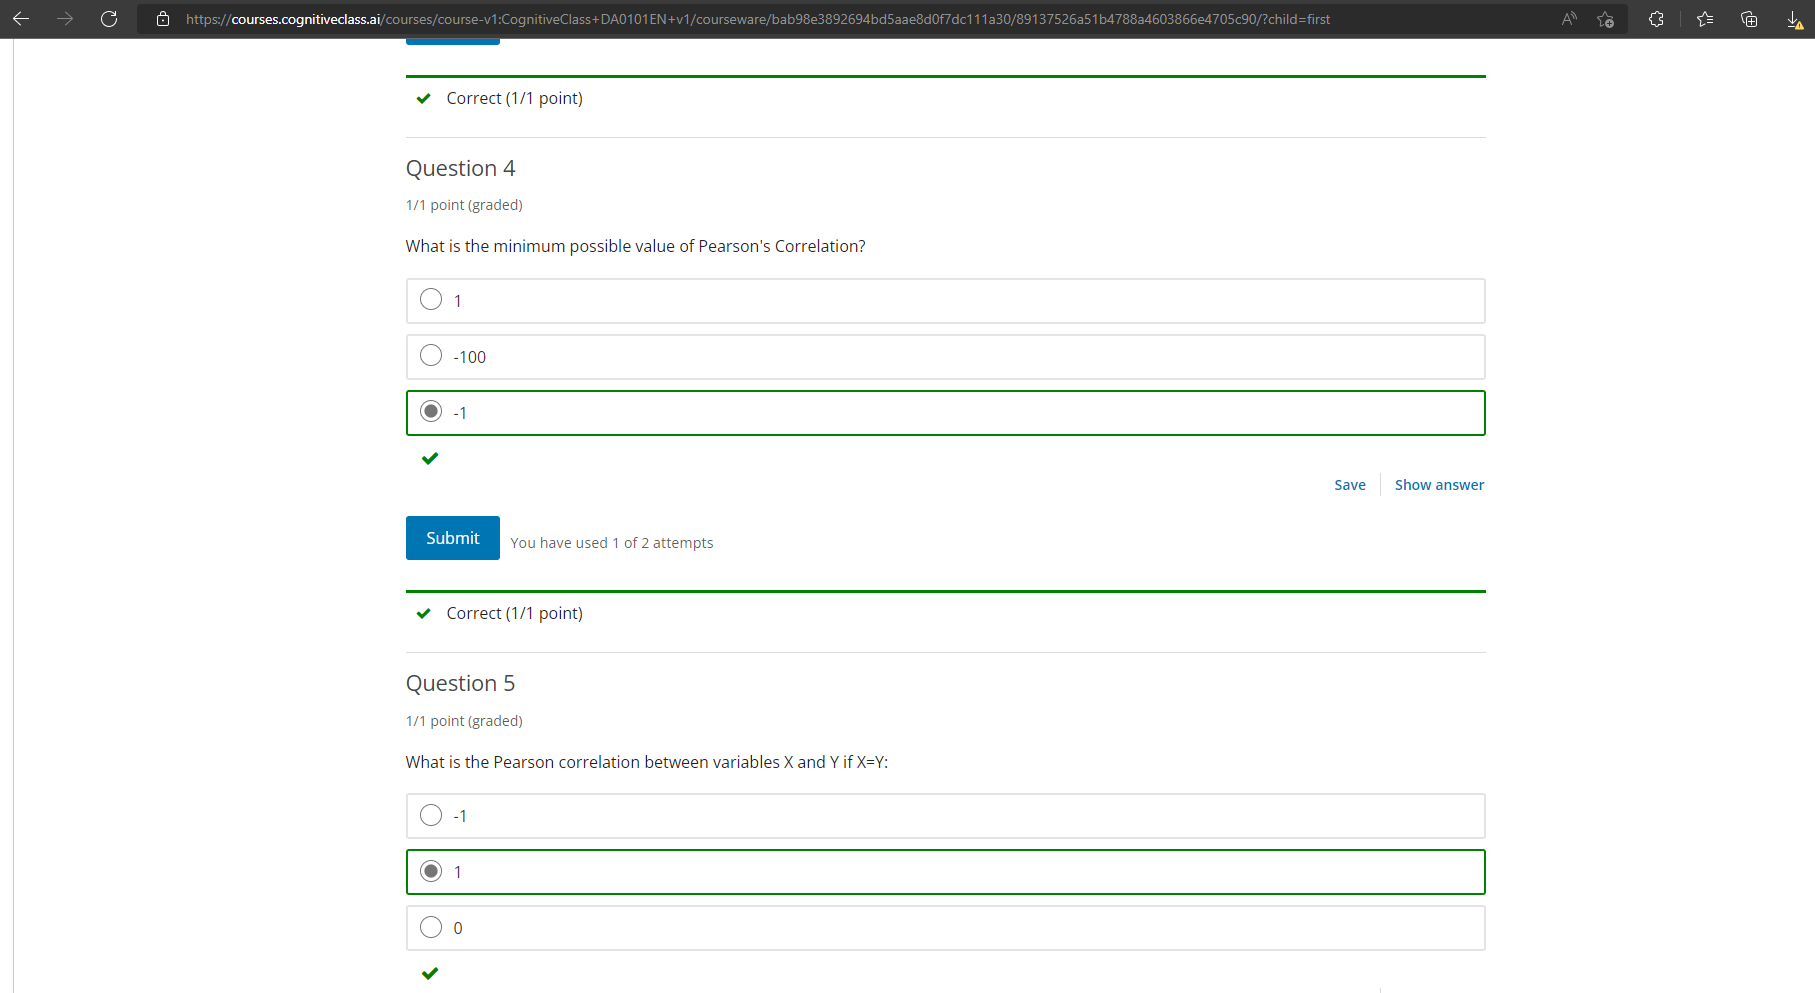